In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 12.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=326879687d900b16c4de2a1148d64c068fe82555acad85381b6bad0c8b33731c
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
data = pd.read_pickle('imputed_data_forest_2.pkl')
data.head()

,YEAR,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,TVA_USD_PPP_pmae_pday,currency_conversion_factor,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,farm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_produce_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,2019.0,1.0,11.19,-0.95,254.0,7.0,5.56,10.000,2.0,1.04,4.0,1.9,30.67,5.0,0.0,0.0,2.0,0.0,0.0,0.159457,218.370143,246.141708,49.228342,196.913367,274.373884,164.857702,242.318219,77.460517,32.055664,32.055664,0.0,0.717683,0.116832,4621.267353,754.360895,0.0,702.949550,0.696542,0.303458,189.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019.0,1.0,11.19,-0.95,346.0,10.0,8.02,6.940,1.2,4.00,3.0,1.9,27.82,4.0,0.0,0.0,2.0,0.0,0.0,0.101856,218.370143,18.317522,0.000000,18.317522,298.162446,0.000000,279.844923,279.844923,18.317522,18.317522,0.0,0.061435,0.061435,2503.023263,2303.522017,0.0,94415.087935,0.539852,0.460148,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019.0,1.0,11.19,-0.99,324.0,6.0,4.69,2.000,0.8,0.30,4.0,1.9,44.43,4.0,0.0,0.0,2.0,0.0,0.0,0.013598,218.370143,0.000000,0.000000,0.000000,23.278518,0.000000,23.278518,23.278518,0.000000,0.000000,0.0,0.000000,0.000000,381.108158,381.108158,9.0,113.654565,0.695815,0.304185,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,1.0,11.19,-0.99,326.0,6.0,4.46,6.532,0.8,5.43,4.0,1.9,31.33,5.0,0.0,0.0,1.0,0.0,0.0,0.308968,218.370143,476.255585,238.127792,238.127792,264.840846,228.969031,255.682085,26.713054,9.158761,9.158761,0.0,0.899135,0.034582,9948.141738,620.787518,4.0,43062.200002,0.243574,0.756426,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,1.0,11.22,-1.02,308.0,8.0,6.52,10.000,4.0,2.12,4.0,1.9,36.86,2.0,0.0,0.0,1.0,0.0,0.0,0.081860,218.370143,32.971540,0.000000,32.971540,194.809347,22.896903,184.734710,161.837807,10.074637,10.074637,0.0,0.169250,0.051715,2209.261281,1767.543491,0.0,13331.792068,0.606037,0.393963,250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = data.drop(['Food_InsecurityLevel','YEAR','currency_conversion_factor'],axis=1)
y = data['Food_InsecurityLevel']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
X_train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,TVA_USD_PPP_pmae_pday,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,farm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_produce_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
24766,1.0,13.290,-85.51,640.000,3.0,2.18,10.500000,12.6,0.00,3.0,1.9,5.31,4.0,3.0,1.0,3.0,2.0,1.0,1.104009,284.311842,0.000000,284.311842,878.460229,284.311842,878.460229,594.148386,0.000000,0.000000,0.000000,0.323648,0.000000,8019.494489,5791.755687,0.0,452.960000,0.697458,0.302542,200.00,0.500000,8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15421,1.0,-1.850,37.72,1080.000,3.0,2.35,3.200000,2.4,0.26,7.0,1.9,18.10,9.0,4.0,2.0,7.0,0.0,7.0,2.133982,1218.847920,853.193544,365.654376,977.229244,150.563567,605.122143,454.558577,215.090809,372.107100,157.016291,0.374175,0.380778,12217.265287,3452.944494,0.0,224.873433,0.000000,1.000000,335.20,-0.500000,-8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6686,1.0,-78.533,-0.91,1823.777,4.0,3.08,1.000000,1.0,1.70,0.0,2.0,8.57,9.0,2.0,2.0,9.0,2.0,2.0,0.903169,883.480248,0.000000,883.480248,1015.342971,553.823437,685.686160,131.862723,329.656811,329.656811,0.000000,0.870130,0.324675,4101.316505,185.732076,0.0,18206.597897,0.000000,0.000000,153.75,0.866025,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2049,1.0,10.810,-3.03,316.000,15.0,10.89,6.000000,4.0,5.52,0.0,1.9,43.50,7.0,0.0,0.0,7.0,0.0,0.0,0.098792,0.000000,0.000000,0.000000,392.681888,0.000000,392.681888,392.681888,0.000000,0.000000,0.000000,0.000000,0.000000,298.501830,298.501830,4.0,27746.885131,1.000000,0.000000,4.00,-1.000000,-1.836970e-16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20931,1.0,12.760,-4.47,367.000,7.0,5.21,2.525000,1.0,0.00,0.0,2.5,95.90,6.0,1.0,2.0,6.0,1.0,2.0,0.315473,0.000000,0.000000,0.000000,599.919396,0.000000,599.919396,599.919396,0.000000,0.000000,0.000000,0.000000,0.000000,1343.570058,1343.570058,0.0,0.000000,0.500000,0.500000,111.40,-1.000000,-1.836970e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifiers = []
classifiers.append(ExtraTreesClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(BaggingClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(SVC(kernel="poly"))
classifiers.append(MLPClassifier())
classifiers.append(GaussianNB())
classifiers.append(LogisticRegression(solver='liblinear'))
classifiers.append(LDA())

In [8]:
classifiers[3]

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [9]:
model = classifiers[3].fit(X_train, y_train)

In [10]:
test = X_test.sample(n=150, random_state=1)
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,HHsizeMAE,LandOwned,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,TVA_USD_PPP_pmae_pday,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,farm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_produce_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
16093,1.0,0.090,34.090,1055.000,5.0,4.32,0.400,2.00,6.75,2.0,1.9,20.70,0.0,0.0,0.0,6.0,3.0,2.0,7.062032,7700.250976,0.000000,7700.250976,11135.411635,6818.378658,10076.895989,3258.517332,881.872318,1058.515646,176.643327,0.691510,0.095059,37069.981360,8604.551941,0.0,64524.552380,0.546767,0.453233,300.00,0.500000,-8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18790,1.0,12.930,102.850,128.300,3.0,2.71,8.000,8.00,0.00,2.0,2.0,0.00,6.0,0.0,3.0,4.0,0.0,3.0,0.013842,7.606660,0.000000,7.606660,13.691987,7.606660,13.691987,6.085328,0.000000,0.000000,0.000000,0.555556,0.000000,56.686477,40.438761,0.0,23.840000,0.500000,0.500000,30.03,0.866025,-5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25268,1.0,35.259,32.224,1952.989,8.0,6.91,1.000,1.00,0.00,0.0,2.0,1.10,6.0,0.0,6.0,6.0,0.0,6.0,20.250530,51074.874124,0.000000,51074.874124,51074.874124,51074.874124,51074.874124,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,125422.093513,0.000000,0.0,5185.200000,1.000000,0.000000,500.00,0.866025,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,1.0,39.435,12.956,1813.385,6.0,4.45,0.750,0.75,0.81,0.0,1.9,4.59,7.0,4.0,3.0,7.0,4.0,3.0,1.112912,1082.873374,216.574675,866.298699,1591.072670,230.570598,955.344570,724.773971,635.728101,635.728101,0.000000,0.544475,0.399559,4032.239278,1345.787287,0.0,7052.353342,0.364034,0.635966,50.00,0.866025,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24770,1.0,13.000,-85.640,622.000,4.0,3.11,1.225,2.75,0.50,2.0,1.9,8.60,5.0,3.0,1.0,4.0,3.0,1.0,3.052505,3465.050579,2425.535406,1039.515174,1039.515174,1039.515174,1039.515174,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19077.088918,45.502004,0.0,982.153969,0.500000,0.500000,135.00,0.866025,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [11]:
shap.initjs()
rf_explainer = shap.KernelExplainer(model.predict, test)
rf_shap_values = rf_explainer.shap_values(test)

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


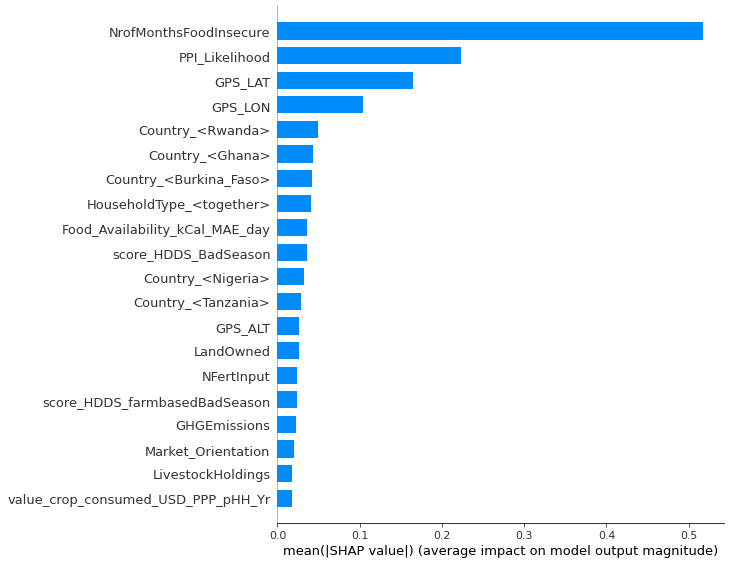

In [12]:
shap.summary_plot(rf_shap_values, test, plot_type="bar")

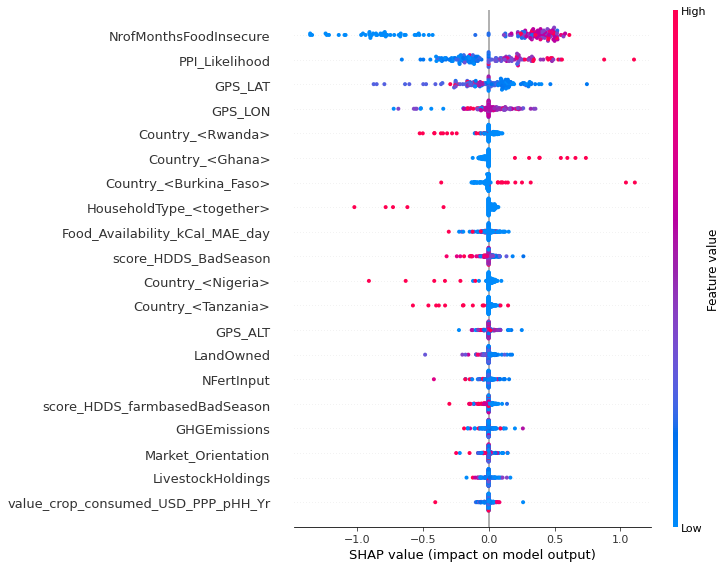

In [13]:
shap.summary_plot(rf_shap_values, test)